# Making Bigram model to predict next character from the sequence

## Load the data for words

In [1]:
words = open("names.txt", 'r').read().splitlines()

In [2]:
names = [word for word in words if word.isalpha()]

In [3]:
len(words)

10177

In [4]:
len(names)

9930

In [5]:
names[:10]

['aaliyah',
 'aaren',
 'aarika',
 'aaron',
 'aartjan',
 'aarushi',
 'abagael',
 'abagail',
 'abahri',
 'abbas']

In [6]:
min(len(w) for w in names)

2

In [7]:
max(len(w) for w in names)

14

In [8]:
b = {}

for word in names:
    word = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(word, word[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [9]:
len(b)

587

In [10]:
sorted(b.items(), key=lambda pair: -pair[1])

[(('a', '<E>'), 2348),
 (('e', '<E>'), 1965),
 (('a', 'n'), 1408),
 (('n', '<E>'), 1321),
 (('a', 'r'), 1046),
 (('i', 'n'), 1016),
 (('e', 'l'), 981),
 (('r', 'i'), 938),
 (('<S>', 'a'), 883),
 (('<S>', 'm'), 855),
 (('n', 'a'), 822),
 (('l', 'i'), 801),
 (('n', 'e'), 792),
 (('e', 'n'), 784),
 (('l', 'e'), 782),
 (('<S>', 'c'), 777),
 (('e', 'r'), 767),
 (('y', '<E>'), 761),
 (('i', 'e'), 705),
 (('<S>', 's'), 700),
 (('m', 'a'), 680),
 (('l', 'a'), 651),
 (('r', 'a'), 651),
 (('a', 'l'), 632),
 (('o', 'n'), 606),
 (('<S>', 'l'), 563),
 (('<S>', 'd'), 557),
 (('l', 'l'), 555),
 (('i', 'a'), 543),
 (('h', 'a'), 543),
 (('i', '<E>'), 540),
 (('n', 'n'), 539),
 (('<S>', 'k'), 537),
 (('<S>', 'j'), 536),
 (('<S>', 'r'), 534),
 (('<S>', 'b'), 529),
 (('r', 'e'), 522),
 (('o', 'r'), 508),
 (('t', 'a'), 488),
 (('i', 's'), 460),
 (('n', 'i'), 453),
 (('<S>', 'e'), 453),
 (('i', 'l'), 452),
 (('<S>', 't'), 435),
 (('d', 'e'), 432),
 (('e', 't'), 417),
 (('d', 'a'), 415),
 (('l', '<E>'), 413)

## Impor the torch

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [13]:
N.dtype

torch.int32

## Create a mapping

In [14]:
chars = sorted(list(set(''.join(names))))

stoi = {s: i + 1 for i, s in enumerate(chars)}

stoi['.'] = 0

itos = {i: s for s, i in stoi.items()}

In [15]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [16]:
for name in names:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(name, name[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

In [17]:
N.shape

torch.Size([27, 27])

In [18]:
N[1]

tensor([2348,   18,  165,  148,  249,   72,   37,   81,  152,  245,   32,   75,
         632,  310, 1408,   28,   35,   12, 1046,  266,  282,  153,   88,   34,
          24,  231,   48], dtype=torch.int32)

## vizualize using matplotlib

(-0.5, 26.5, 26.5, -0.5)

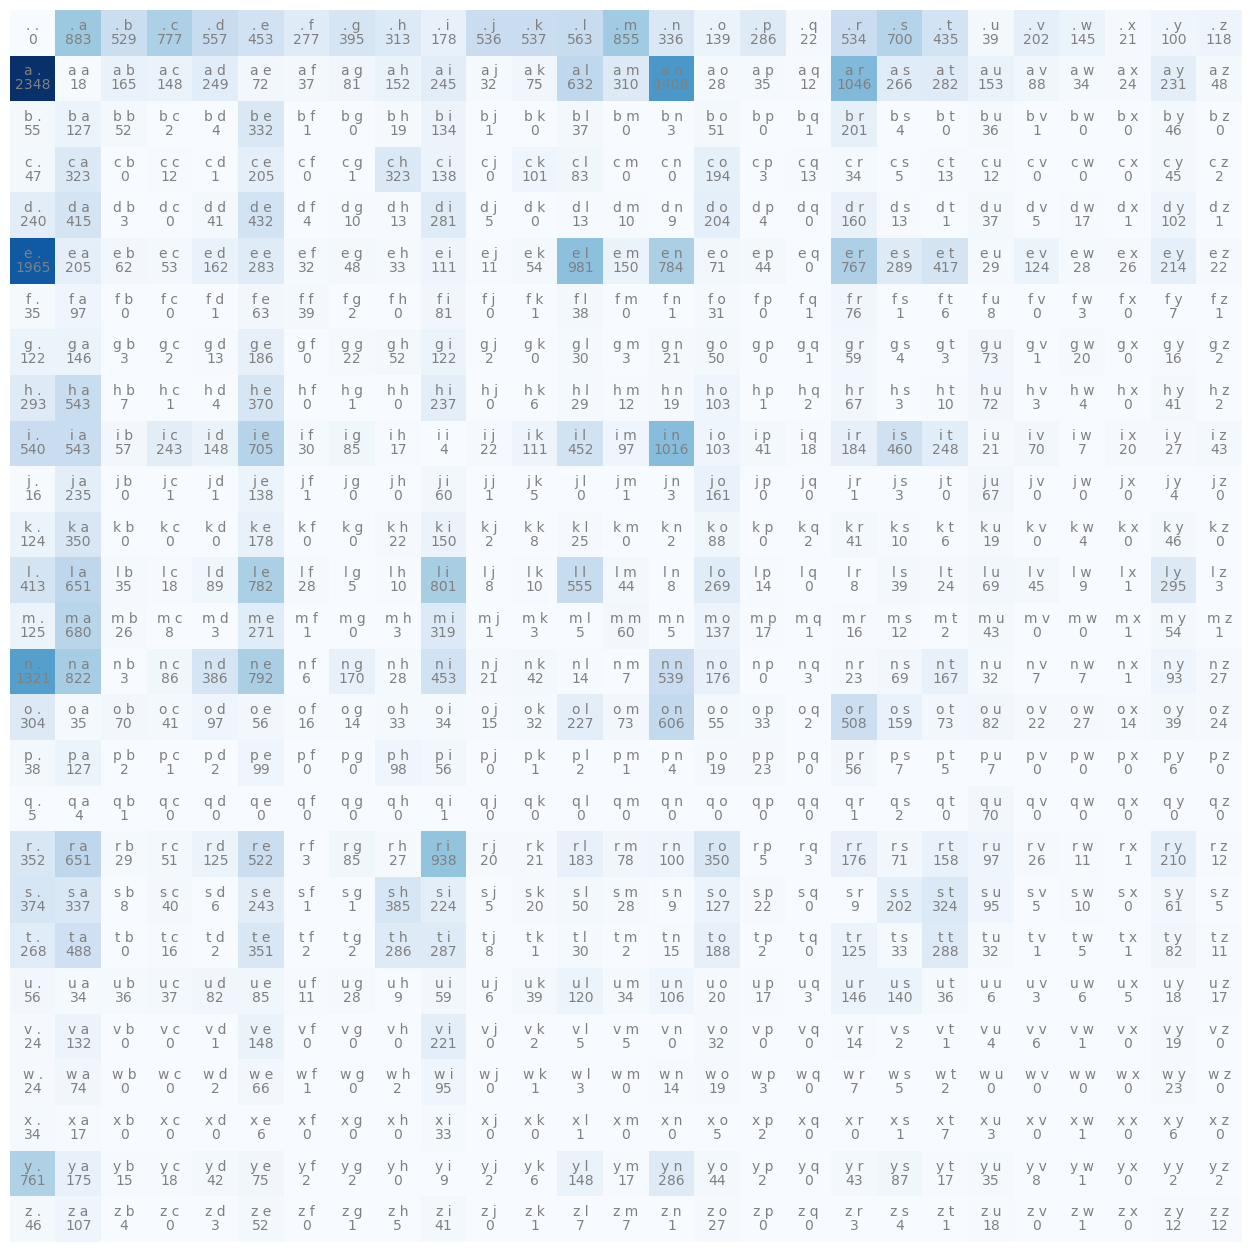

In [19]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chr = itos[i] + " " + itos[j]
        plt.text(j, i, chr, color='grey', ha='center', va='bottom')
        plt.text(j, i, N[i, j].item(), color='grey', ha='center', va='top')

plt.axis('off')

### How to create probablities

In [20]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0889, 0.0533, 0.0782, 0.0561, 0.0456, 0.0279, 0.0398, 0.0315,
        0.0179, 0.0540, 0.0541, 0.0567, 0.0861, 0.0338, 0.0140, 0.0288, 0.0022,
        0.0538, 0.0705, 0.0438, 0.0039, 0.0203, 0.0146, 0.0021, 0.0101, 0.0119])

In [21]:
p.sum()    # The sum of all the probablities is always 1

tensor(1.)

In [22]:
g = torch.Generator().manual_seed(1234)
ix = torch.multinomial(p, num_samples=5, replacement=True, generator=g)
items = [itos[i.item()] for i in ix]

In [23]:
items

['d', 'a', 'j', 'h', 'h']

## Create a Bigram model using the probablites

In [24]:
P = (N + 1).float()     # the + 1 here is for smooting purpose more the num smoother the curve
P /= P.sum(1, keepdims=True)

In [25]:
# Here Keepdims is used to keep the dimensions broadcastable
P.sum(1).shape    # This is a row vector so this will divide different values for every elem in row which is not desirable

torch.Size([27])

In [26]:
P.sum(1, keepdims=True).shape   # The keepdims param keeps the column vector so there is no ambuguity

torch.Size([27, 1])

In [27]:
P.shape

torch.Size([27, 27])

In [28]:
g = torch.Generator().manual_seed(1234)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

k.
melin.
danilfiebrverar.
mata.
cyin.


In [29]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

# The log likelihood just add the log probablities

In [34]:
log_likelihood = 0.0
n = 0

for name in names:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(name, name[1:]):
        log_likelihood += torch.log(P[stoi[ch1], stoi[ch2]])
        n += 1

print(f"{log_likelihood=}")  # You need to maximize the log_likelihood
nll = -log_likelihood        # You need to minimize the neg_log_likelihood
print(f"{nll=}")            
print(nll / n)               # This is the mean of the log_likelihood

log_likelihood=tensor(-168702.7344)
nll=tensor(168702.7344)
tensor(2.4586)


## Creat training set

In [35]:
xs, ys = [], []

for name in names[:1]:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(name, name[1:]):
        print(ch1, ch2)
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

. a
a a
a l
l i
i y
y a
a h
h .


In [36]:
xs

[0, 1, 1, 12, 9, 25, 1, 8]

In [37]:
ys

[1, 1, 12, 9, 25, 1, 8, 0]

In [39]:
xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(f"The shape of the xs is {xs.shape}")
print(f"The shape of the ys is {ys.shape}")

The shape of the xs is torch.Size([8])
The shape of the ys is torch.Size([8])


## One hot encode the feature and the target

In [40]:
import torch.nn.functional as F

In [41]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0

In [42]:
xenc.shape

torch.Size([8, 27])

(-0.5, 26.5, 7.5, -0.5)

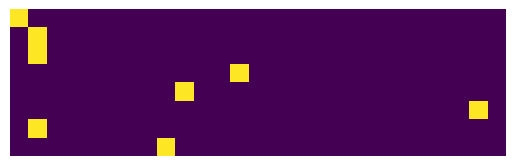

In [46]:
plt.imshow(xenc)
plt.axis('off')

In [47]:
xenc.dtype

torch.float32

In [55]:
W = torch.rand((27, 27), dtype=torch.float32)

In [56]:
xenc @ W

tensor([[0.5168, 0.5031, 0.1356, 0.0425, 0.3795, 0.2137, 0.0013, 0.6990, 0.5984,
         0.5588, 0.8883, 0.1517, 0.4826, 0.6576, 0.4284, 0.0129, 0.8145, 0.9057,
         0.0132, 0.8299, 0.4782, 0.9164, 0.8904, 0.9297, 0.6767, 0.8614, 0.7232],
        [0.9934, 0.4451, 0.9226, 0.4699, 0.6430, 0.2515, 0.4949, 0.8442, 0.2294,
         0.6569, 0.0094, 0.1413, 0.9615, 0.6042, 0.3629, 0.8416, 0.8569, 0.3046,
         0.9912, 0.6630, 0.1819, 0.6992, 0.0126, 0.4233, 0.9498, 0.0034, 0.8962],
        [0.9934, 0.4451, 0.9226, 0.4699, 0.6430, 0.2515, 0.4949, 0.8442, 0.2294,
         0.6569, 0.0094, 0.1413, 0.9615, 0.6042, 0.3629, 0.8416, 0.8569, 0.3046,
         0.9912, 0.6630, 0.1819, 0.6992, 0.0126, 0.4233, 0.9498, 0.0034, 0.8962],
        [0.0333, 0.7223, 0.3872, 0.1420, 0.8662, 0.5767, 0.9789, 0.6566, 0.6545,
         0.1644, 0.6275, 0.9720, 0.4325, 0.3459, 0.8593, 0.0347, 0.4453, 0.4562,
         0.2138, 0.7191, 0.3827, 0.7164, 0.5904, 0.8660, 0.8590, 0.4099, 0.4169],
        [0.2507, 0.1432,

In [57]:
logits = xenc @ W             # log equivalent
counts = torch.exp(logits)    # n equivalent
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0349, 0.0345, 0.0239, 0.0217, 0.0304, 0.0258, 0.0209, 0.0419, 0.0379,
         0.0364, 0.0506, 0.0242, 0.0337, 0.0402, 0.0320, 0.0211, 0.0470, 0.0515,
         0.0211, 0.0478, 0.0336, 0.0521, 0.0507, 0.0528, 0.0410, 0.0493, 0.0429],
        [0.0549, 0.0317, 0.0511, 0.0325, 0.0386, 0.0261, 0.0333, 0.0473, 0.0256,
         0.0392, 0.0205, 0.0234, 0.0531, 0.0372, 0.0292, 0.0471, 0.0479, 0.0276,
         0.0547, 0.0394, 0.0244, 0.0409, 0.0206, 0.0310, 0.0525, 0.0204, 0.0498],
        [0.0549, 0.0317, 0.0511, 0.0325, 0.0386, 0.0261, 0.0333, 0.0473, 0.0256,
         0.0392, 0.0205, 0.0234, 0.0531, 0.0372, 0.0292, 0.0471, 0.0479, 0.0276,
         0.0547, 0.0394, 0.0244, 0.0409, 0.0206, 0.0310, 0.0525, 0.0204, 0.0498],
        [0.0216, 0.0429, 0.0307, 0.0240, 0.0496, 0.0371, 0.0555, 0.0402, 0.0401,
         0.0246, 0.0391, 0.0551, 0.0321, 0.0295, 0.0493, 0.0216, 0.0326, 0.0329,
         0.0258, 0.0428, 0.0306, 0.0427, 0.0376, 0.0496, 0.0492, 0.0314, 0.0316],
        [0.0300, 0.0269,

In [58]:
probs.shape

torch.Size([8, 27])

In [59]:
counts[0].sum()

tensor(48.0085)

In [60]:
probs[0].sum()

tensor(1.)

In [61]:
g = torch.Generator().manual_seed(1234)
W = torch.rand((27, 27), generator=g)

In [62]:
logits = xenc @ W
counts = torch.exp(logits)
probs = counts / counts.sum(1, keepdims=True)
probs.shape

torch.Size([8, 27])

In [63]:
nlls = torch.zeros(8)

for i in range(8):
    x = xs[i].item()
    y = ys[i].item()
    print('-------------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
    
print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

-------------------
bigram example 1: .a (indexes 0,1)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0227, 0.0330, 0.0286, 0.0319, 0.0234, 0.0445, 0.0233, 0.0353, 0.0433,
        0.0308, 0.0484, 0.0388, 0.0479, 0.0502, 0.0292, 0.0437, 0.0293, 0.0426,
        0.0280, 0.0459, 0.0403, 0.0299, 0.0285, 0.0414, 0.0581, 0.0463, 0.0347])
label (actual next character): 1
probability assigned by the net to the the correct character: 0.03301117569208145
log likelihood: -3.4109091758728027
negative log likelihood: 3.4109091758728027
-------------------
bigram example 2: aa (indexes 1,1)
input to the neural net: 1
output probabilities from the neural net: tensor([0.0332, 0.0451, 0.0240, 0.0401, 0.0288, 0.0454, 0.0284, 0.0348, 0.0402,
        0.0479, 0.0316, 0.0536, 0.0223, 0.0311, 0.0206, 0.0354, 0.0391, 0.0277,
        0.0418, 0.0313, 0.0220, 0.0499, 0.0462, 0.0437, 0.0506, 0.0408, 0.0443])
label (actual next character): 1
probability assigned by the net to the the

### A step towards optimization

In [80]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [81]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(8), ys].log().mean()

In [82]:
# backward pass
W.grad = None
loss.backward()

In [84]:
W.data += -1.0 * W.grad

### Optimization

In [125]:
xs, ys = [], []

for name in names:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(name, name[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

n = xs.nelement()
print(f"The number of elements is {n}.")

# Initiliaze the weights of the 27 neurons
g = torch.Generator().manual_seed(1234)
W = torch.rand((27, 27), generator=g, requires_grad=True)

The number of elements is 68617.


In [141]:
xenc = F.one_hot(xs, num_classes=27).float()

In [127]:
xenc.shape

torch.Size([68617, 27])

In [133]:
# gradient descent
for k in range(20):
  
  # forward pass
  # xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(n), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.4909534454345703
2.4908294677734375
2.490708112716675
2.4905903339385986
2.4904744625091553
2.4903621673583984
2.4902522563934326
2.490144729614258
2.490039587020874
2.4899370670318604
2.4898366928100586
2.489738702774048
2.489642858505249
2.489548921585083
2.489457130432129
2.489367723464966
2.4892799854278564
2.489193916320801
2.489109992980957
2.489027500152588


## Try predicting names form the neural nets output

In [143]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p[ix], num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junjde.
canasar.
p.
cl.
a.
